# Import Functions / Modules

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')

#import viewer functions
from dataViewer import plotTraj, animatePreview, animateLoc, animateTraj

%matplotlib inline

# Load Dataset

In [8]:
# Deutsche uni

# Dataset Information
# 
# Frame rate: 16 FPS
#
# Person id | frame | x pos | y pos | z pos

FPS = 16
BG = "Datasets/UG/ug.png"
PATH_1 = "Datasets/UG/UG-roh_nachkorrigiert/ug-100-007.txt"

In [9]:
class DataLoader():
    def __init__(self, path, x_o=0, y_o=0):
        self.path = path
        self.x_offset = x_o
        self.y_offset = y_o
        with open(path) as f:
            df = pd.DataFrame(columns=['p', 'f', 'x', 'y', 'z'] )
            for line in f:
                data = [float(d) for d in line.strip().split()]
                df = df.append( dict( zip(df.columns, data) ), ignore_index=True )
                
        self.data = df 
        
    
    def person(self, id):
        self.temp = self.data[self.data['p'] == id]
        
        l = len(self.temp)
        cor = np.vstack((np.ones(l)*-1, np.ones(l))).T
        offset = np.vstack((np.ones(l)*self.x_offset, np.ones(l)*self.y_offset)).T
        return self.temp['f'].to_numpy(), self.temp[['y', 'x']].to_numpy() * cor+offset
    
    
    def frame(self, id):
        self.temp = self.data[self.data['f'] == id]
        l = len(self.temp)
        cor = np.vstack((np.ones(l)*-1, np.ones(l))).T
        offset = np.vstack((np.ones(l)*self.x_offset, np.ones(l)*self.y_offset)).T
        return self.temp['p'].to_numpy(), self.temp[['y', 'x']].to_numpy() * cor+offset
    
    def __len__(self):
        return int(self.data['f'].max() - self.data['f'].min())
    

In [10]:
loader_1 = DataLoader(PATH_1)

# Plot Trajectories

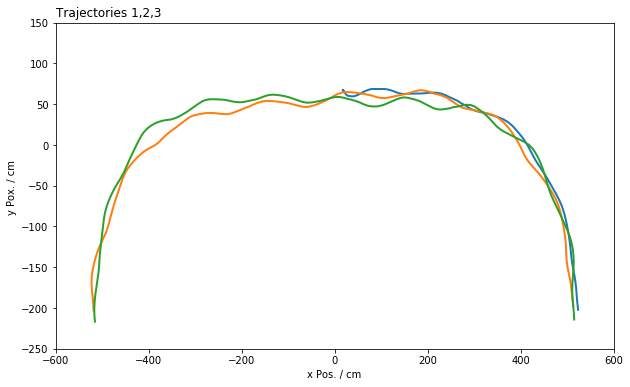

In [24]:
plotTraj(loader_1, boundaries=[-600, 600, -250, 150], people=[1,10,16], legend=False, title="Trajectories 1,2,3", save=False)

# Animate Location / Trajectories

In [25]:
animatePreview(loader_1, boundaries=[600, -600, -250, 150], step=10)

In [33]:
ani = animateLoc(loader_1, frame_start=0, frame_stop=len(loader_1), boundaries=[-600, 600, -250, 150], step=5, fps=16, title="ululululu")
ani

In [30]:
ani = animateTraj(loader_1, frame_start=500, frame_stop=800, boundaries=[-600, 600, -250, 150], step=5, fps=16, title="Trajectory Animation")
ani